<a href="https://colab.research.google.com/github/ef1s/ML-Econ441b-SY/blob/main/Econ442b-A10-SY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import and Clean data

In [139]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [140]:
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from sklearn.decomposition import PCA

In [141]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [142]:
df = pd.read_csv("/content/gdrive/MyDrive/Country-data.csv", sep = ",")

In [143]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [144]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [145]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)



In [146]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Run a PCA Algorithm to get 2 Principle Components for the 9 X features

In [147]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_scaled)

In [148]:
#x_pca

# 2.) Plot a Scatter plot of the PCs on the axis

[]

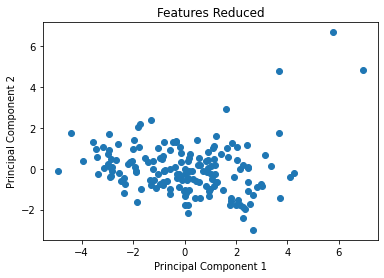

In [149]:
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Features Reduced')
plt.plot()

# 3.) Rank the features in order of importance according to PCA

In [150]:
loadings = pca.components_

In [151]:
loadings

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ]])

In [152]:
feature_importance = pd.DataFrame(np.sum(loadings**2, axis=0))

In [153]:
feature_names = df.columns[1:]

In [154]:
feature_importance.index = feature_names

In [155]:
feature_importance.sort_values(0,ascending=False)

,0
imports,0.477420
exports,0.456567
life_expec,0.230937
child_mort,0.213201
total_fer,0.187094
income,0.159263
gdpp,0.156288
health,0.081843
inflation,0.037386


# 4.) Plot a heatmap of the feature importance (Fill in all parameters)

In [156]:
feature_names = df.columns[1:]

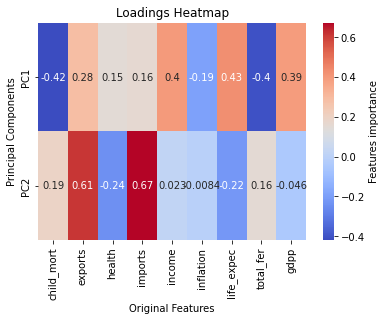

In [157]:

#sns.heatmap(, annot=, cmap='coolwarm', xticklabels=, yticklabels=[, ], cbar_kws={'label':''})
sns.heatmap(loadings,annot=True, cmap='coolwarm',xticklabels=feature_names,yticklabels=['PC1','PC2'],cbar_kws={'label':'Features importance'})
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.title('Loadings Heatmap')
plt.show()

# 5.) Plot a correlation plot of the original features. What do you notice between the graphs of 4 & 5?

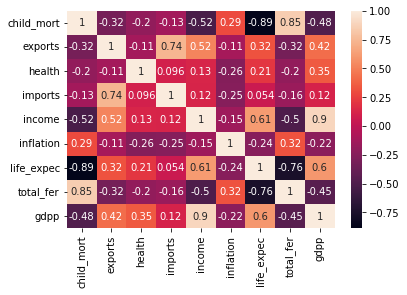

In [163]:
sns.heatmap(X.corr(('pearson')),annot=True)
plt.show()

The graph 5 shows evidence of multicollinearity between features. However, this issue was effectively addressed by performing PCA in graph 4. By extracting the top two principal components, which are able to capture most of the variance in the original features, it was possible to reduce the dimensionality of the dataset while retaining the essential information. Therefore, PCA successfully resolved the issue of multicollinearity and allowed for more efficient and accurate analysis of the data.





# 6.) Run a PCA with 9 PCs. Plot a Cumulative Explained Variance Plot. How many PCs should we use if we want to retain 95% of the variance?

In [159]:
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)

In [160]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

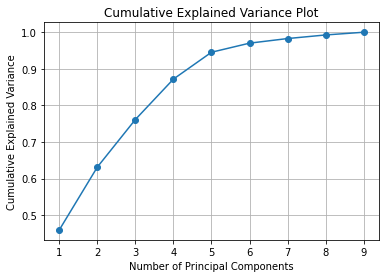

In [161]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid()
plt.show()

In [162]:
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
print('To retain 95% variance, we should use',n_components,'components.')

To retain 95% variance, we should use 6 components.
